In [6]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [7]:
df = pd.read_csv(r"../../data/processed/trickbot_static.csv")

df.drop("Is Encrypted Traffic", axis=1, inplace=True)

## EDA

In [8]:
info = prisma.DatasetInformation(df)

info.dataframe_summary()

### Shape:

(44748, 31)

### Columns and Metadata:

,Data Type,Null Values,Percentage of Nulls
Duration,float64,0,0.0
Source Port,int64,0,0.0
Destination Port,int64,0,0.0
Protocol,object,0,0.0
Flags,object,0,0.0
Packets,int64,0,0.0
Bytes,int64,0,0.0
Mean Payload Size,float64,0,0.0
Std Payload Size,float64,0,0.0
Min Payload Size,int64,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,0


### Categorical

In [9]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,Protocol,6,TCP,50.16%
1,Flags,13,"PSH,ACK",49.67%
2,Label,2,Benign,60.38%
3,direction,1,outbound,100.00%


### Column: Protocol

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TCP,22445,50.158666
1,TLS,22071,49.322875
2,HTTP,171,0.382140
3,DATA,59,0.131849
4,DATA-TEXT-LINES,1,0.002235
5,MEDIA,1,0.002235


---

### Column: Flags

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,"PSH,ACK",22225,49.667024
1,"SYN,RST,ACK",7128,15.929204
2,"SYN,ACK",6966,15.567176
3,"FIN,SYN,ACK",3297,7.367927
4,"FIN,SYN,RST,ACK",2840,6.346652
5,"FIN,SYN,RST,PSH,ACK",840,1.877179
6,"FIN,SYN,PSH,ACK",519,1.159828
7,"SYN,PSH,ACK",430,0.960937
8,"SYN,RST,PSH,ACK",340,0.759810
9,SYN,81,0.181014


---

### Column: Label

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Benign,27018,60.378117
1,trickbot,17730,39.621883


---

### Column: direction

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,outbound,44748,100.000000


---

### Numerical

### Numerical Columns Statistical Summary:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,...,Bytes per Second,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,short_duration,single_packet
Mean,42.266088,2.770653e+04,2.754237e+04,5.487977,1.752890e+03,207.470941,146.042754,74.219317,452.116005,1.806782,...,2.923595e+06,0.490502,2.462769,0.501542,0.998145,0.168589,0.003821,0.501542,0.011978,0.008134
Median,9.004726,4.919500e+04,4.470000e+02,5.000000,6.190000e+02,172.500000,62.887907,42.000000,295.000000,3.070879,...,6.923841e+01,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Mode,0.000001,4.430000e+02,4.430000e+02,4.000000,1.480000e+02,37.000000,5.196152,34.000000,46.000000,0.000000,...,1.910000e+08,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Std Dev,58.466047,2.728006e+04,2.728255e+04,9.769519,1.311925e+04,229.692852,204.690121,68.386748,550.595843,1.715219,...,5.261095e+07,0.499915,0.729132,0.500003,0.043028,0.374392,0.061700,0.500003,0.108789,0.089825
Variance,3418.278689,7.442016e+08,7.443378e+08,95.443505,1.721148e+08,52758.806447,41898.045800,4676.747349,303155.782574,2.941978,...,2.767912e+15,0.249915,0.531633,0.250003,0.001851,0.140170,0.003807,0.250003,0.011835,0.008068
Range,3078.013783,6.034000e+04,6.034000e+04,343.000000,5.066310e+05,1459.933333,729.458624,1460.000000,1454.000000,3.584389,...,1.494000e+09,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min,0.000001,8.000000e+01,8.000000e+01,1.000000,4.100000e+01,34.066667,0.000000,34.000000,40.000000,0.000000,...,8.459671e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,3078.013784,6.042000e+04,6.042000e+04,344.000000,5.066720e+05,1494.000000,729.458624,1494.000000,1494.000000,3.584389,...,1.494000e+09,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,...,Bytes per Second,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,short_duration,single_packet
Duration,1.000000,0.315253,-0.341227,0.115633,-0.025350,-0.268410,-0.238678,-0.305063,-0.266608,-0.328841,...,-0.040173,-0.332539,0.504694,0.352673,0.024571,0.223908,-0.044775,0.319444,-0.079570,-0.065468
Source Port,0.315253,1.000000,-0.992930,-0.035930,-0.094762,-0.377192,-0.520309,0.142583,-0.493570,-0.029365,...,-0.030550,-0.980717,0.119600,0.000308,-0.035711,-0.029561,0.007312,0.996444,-0.011219,0.003382
Destination Port,-0.341227,-0.992930,1.000000,0.029287,0.091134,0.381011,0.525218,-0.134130,0.500373,0.026624,...,0.024094,0.980944,-0.150620,-0.000436,0.042819,-0.022543,-0.011647,-0.996481,0.005036,-0.009410
Packets,0.115633,-0.035930,0.029287,1.000000,0.900956,0.273757,0.072230,-0.103248,0.112476,-0.019018,...,-0.025107,0.018831,0.174632,0.128014,0.010712,0.079097,-0.028453,-0.032801,-0.043622,-0.041603
Bytes,-0.025350,-0.094762,0.091134,0.900956,1.000000,0.379263,0.144015,-0.014299,0.194965,0.104988,...,-0.002941,0.079075,0.050524,0.007292,0.005313,0.000575,-0.007565,-0.094457,-0.009685,-0.009621
Mean Payload Size,-0.268410,-0.377192,0.381011,0.273757,0.379263,1.000000,0.870804,0.385357,0.902251,0.700324,...,0.179699,0.369305,-0.315315,-0.591557,0.030576,-0.241008,-0.015350,-0.379130,0.045762,0.059811
Std Payload Size,-0.238678,-0.520309,0.525218,0.072230,0.144015,0.870804,1.000000,0.140328,0.988219,0.650842,...,-0.039603,0.514876,-0.318406,-0.592741,0.030346,-0.235943,-0.044191,-0.520581,-0.063207,-0.064614
Min Payload Size,-0.305063,0.142583,-0.134130,-0.103248,-0.014299,0.385357,0.140328,1.000000,0.251306,0.560438,...,0.711417,-0.131784,-0.371568,-0.574380,0.020401,-0.245183,0.069126,0.132255,0.320111,0.377347
Max Payload Size,-0.266608,-0.493570,0.500373,0.112476,0.194965,0.902251,0.988219,0.251306,1.000000,0.696535,...,0.050296,0.486331,-0.347543,-0.637932,0.031796,-0.257136,-0.033924,-0.494470,-0.021937,-0.015288
Mean Entropy,-0.328841,-0.029365,0.026624,-0.019018,0.104988,0.700324,0.650842,0.560438,0.696535,1.000000,...,0.053287,0.027136,-0.568073,-0.976476,0.045409,-0.411551,0.050829,-0.028674,0.057331,0.072687


### Correlation Matrix Heatmap:

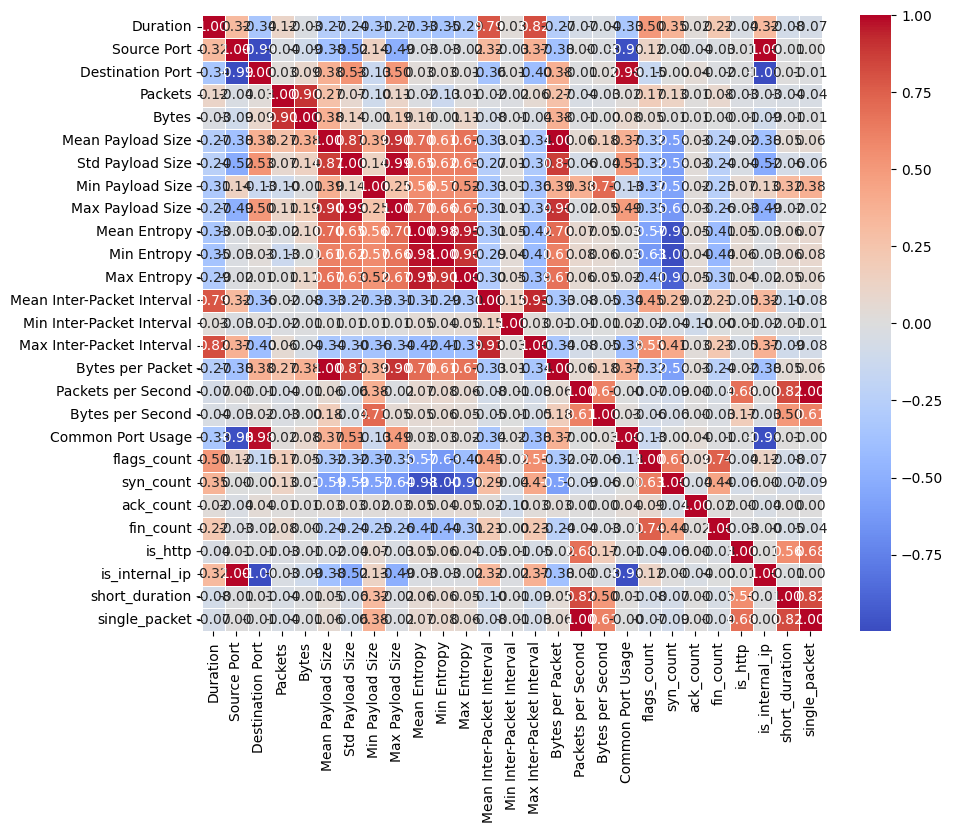

In [10]:
info.numerical_summary()

## Modeling

### Final Data Prep

In [11]:
def save_as_pickle(path, variable):
    with open(path, "wb") as file:
        pickle.dump(variable, file)

#### Encoding

In [12]:
encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ["Protocol", "Flags", "Label", "direction"]

# Apply label encoding to each column
for column in columns_to_encode:
    # Fit label encoder and return encoded labels
    path = "../../variables/trickbot/static_no_pca" + column + "_Encoder.pkl"
    df[column] = encoder.fit_transform(df[column])
    save_as_pickle(path, encoder)

#### Type Casting

In [13]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df["flags_count"] = df["flags_count"].astype("float64")

In [14]:
# df.drop(["Protocol","Packets","Bytes","Duration", "bytes_per_packet","fin_count", "packet_length", "short_duration","Source Port"], axis=1,inplace=True)

### Data Splitting

In [15]:
# Separate the 'Status' column
label_column = df["Label"]
dropped_df = df.drop("Label", axis=1)

# Initialize and apply MinMaxScaler to the dropped_df
scaler = StandardScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())
print(dropped_df.columns)
# Create a DataFrame from the scaled dropped_df
df = pd.DataFrame(scaled_dropped_df, columns=dropped_df.columns)

# Reattach the 'Status' column
df["Label"] = label_column

save_as_pickle(r"../../variables/trickbot/static_no_pca/scaler.pkl", scaler)

Index(['Duration', 'Source Port', 'Destination Port', 'Protocol', 'Flags',
       'Packets', 'Bytes', 'Mean Payload Size', 'Std Payload Size',
       'Min Payload Size', 'Max Payload Size', 'Mean Entropy', 'Min Entropy',
       'Max Entropy', 'Mean Inter-Packet Interval',
       'Min Inter-Packet Interval', 'Max Inter-Packet Interval',
       'Bytes per Packet', 'Packets per Second', 'Bytes per Second',
       'Common Port Usage', 'flags_count', 'syn_count', 'ack_count',
       'fin_count', 'is_http', 'is_internal_ip', 'direction', 'short_duration',
       'single_packet'],
      dtype='object')


## Models

### Model Creation and Parameters

In [16]:
#! Model Evaluation
test_size = 0.3
iterations = 30

#! KNN
n_neighbors = 5
knn_train_model = KNeighborsClassifier(n_neighbors=n_neighbors)

#! Random Forest
n_estimators = 100  # You can adjust this number as needed
rf_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Logistic Regression
max_iter = 5000
logreg_model = LogisticRegression(max_iter=max_iter)

### Splitting

In [17]:
# Reset the index to convert it to a normal column (if needed)
df_reset = df.reset_index(drop=True)  # This will drop the old index column
X = df_reset.drop("Label", axis=1)  # Now drop the Label
if 'index' in X.columns:
    X.drop('index', axis=1, inplace=True)
y = df["Label"]

### KNN

In [45]:
knn_normal = prisma.MachineLearning()
knn_normal_metrics, avg_knn_normal_metrics, knn_normal_model = (
    knn_normal.evaluate_model(X, y, test_size, iterations, knn_train_model)
)

Evaluating model: 100%|██████████| 30/30 [00:56<00:00,  1.88s/it]


### Random Forest

In [46]:
rf_normal = prisma.MachineLearning()
(
    rf_normal_metrics,
    avg_rf_normal_metrics,
    rf_normal_model,
) = rf_normal.evaluate_model(X, y, test_size, iterations, rf_train_model)

Evaluating model:   3%|▎         | 1/30 [00:16<08:08, 16.85s/it]


KeyboardInterrupt: 

### Logistic Regression

In [18]:
logreg_normal = prisma.MachineLearning()
(
    logreg_normal_metrics,
    avg_logreg_normal_metrics,
    logreg_normal_model,
) = logreg_normal.evaluate_model(X, y, test_size, iterations, logreg_model)

Evaluating model: 100%|██████████| 30/30 [00:21<00:00,  1.39it/s]


### Model Evaluation

### Model Evaluation

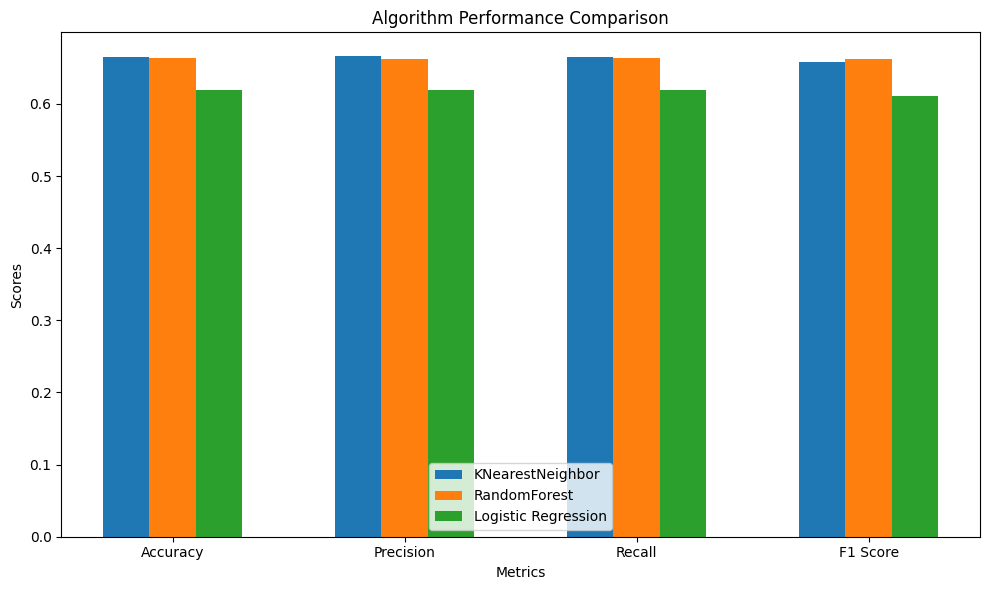

In [20]:
normal_metrics = {"KNearestNeighbor":avg_knn_normal_metrics, "RandomForest":avg_rf_normal_metrics, "Logistic Regression":avg_logreg_normal_metrics}
plot = prisma.Plotting(df)

plot.plot_algorithm_comparison(normal_metrics)

In [21]:
normal_metrics

{'KNearestNeighbor': {'Accuracy': 0.665,
  'Precision': 0.666,
  'Recall': 0.665,
  'F1 Score': 0.658},
 'RandomForest': {'Accuracy': 0.664,
  'Precision': 0.663,
  'Recall': 0.664,
  'F1 Score': 0.663},
 'Logistic Regression': {'Accuracy': 0.62,
  'Precision': 0.619,
  'Recall': 0.62,
  'F1 Score': 0.611}}

In [28]:
save_as_pickle(r"../../models/Rbot_KNN.pkl", knn_normal_model)

In [19]:
avg_logreg_normal_metrics


{'Accuracy': 0.632, 'Precision': 0.645, 'Recall': 0.632, 'F1 Score': 0.552}

In [20]:
logreg_normal_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.635009,0.650661,0.635009,0.551830
1,0.630317,0.632394,0.630317,0.554237
2,0.635605,0.646118,0.635605,0.556490
3,0.624953,0.630005,0.624953,0.548658
4,0.628827,0.634773,0.628827,0.551343
5,0.631657,0.655004,0.631657,0.548266
6,0.637542,0.656597,0.637542,0.553248
7,0.627858,0.631860,0.627858,0.547955
8,0.634115,0.649050,0.634115,0.553362
9,0.634935,0.647581,0.634935,0.555136


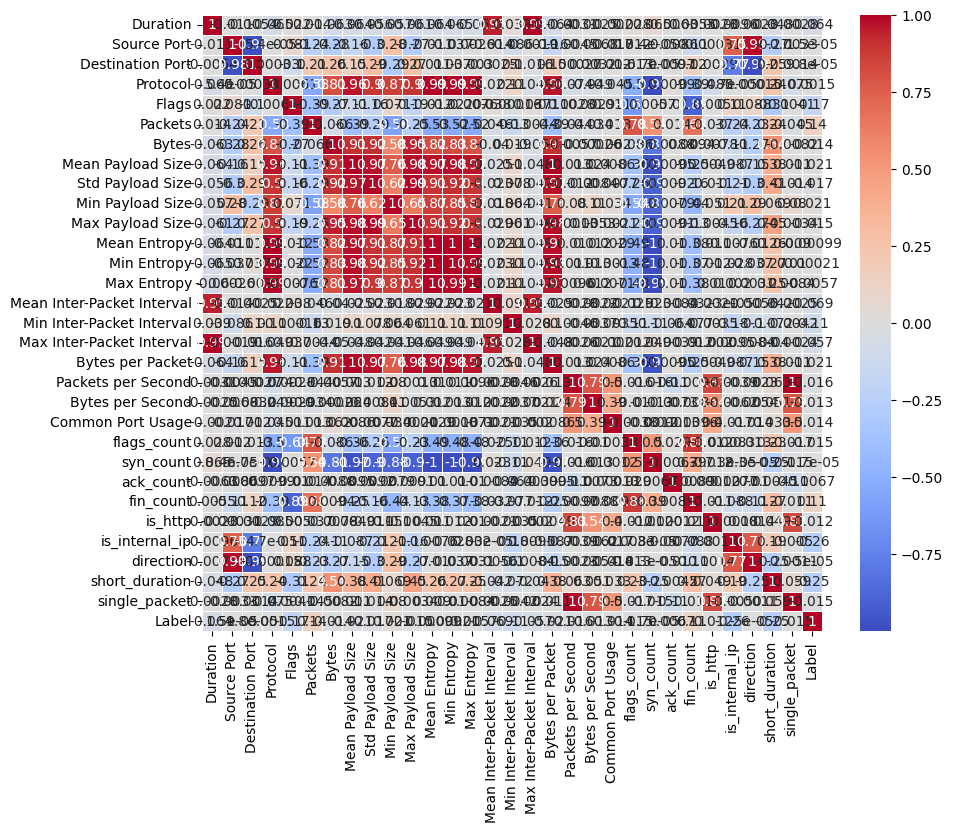

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the heatmap
plt.show()

In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

# Define the XGBoost classifier with default settings
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=1.2,
    max_depth=3,
    alpha=0.09,  # L1 regularization
    reg_lambda=0.09,        # L2 regularization (formerly lambda_)
    n_estimators=100,  # Control the number of trees
    learning_rate=0.125,  # Decreased learning rate
    subsample=0.8,  # Use 80% of data for training each tree
    colsample_bytree=0.8,  # Use 80% of features for training each tree
    random_state=23  # For reproducibility
)
#! 0.1, 0.11,
# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.9134450651769087
Confusion Matrix:
 [[7529  577]
 [ 585 4734]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      8106
           1       0.89      0.89      0.89      5319

    accuracy                           0.91     13425
   macro avg       0.91      0.91      0.91     13425
weighted avg       0.91      0.91      0.91     13425



In [22]:
# Check the performance on the training data
y_train_pred = xgb_model.predict(X_train)

# Evaluate on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# You already have test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9144717938894742
Test Accuracy: 0.9134450651769087


In [23]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5)

# Print the average accuracy across the folds
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy: 0.6196260373026292


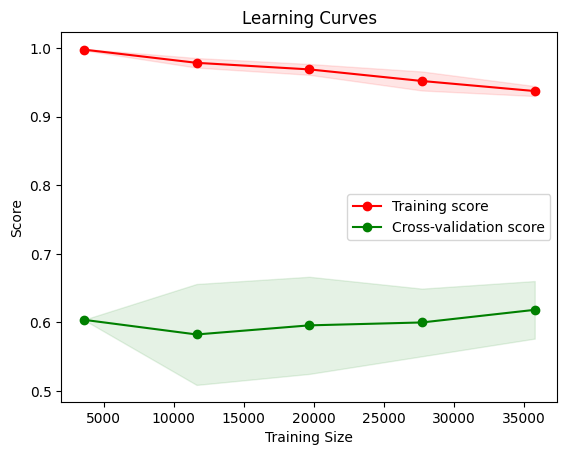

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()


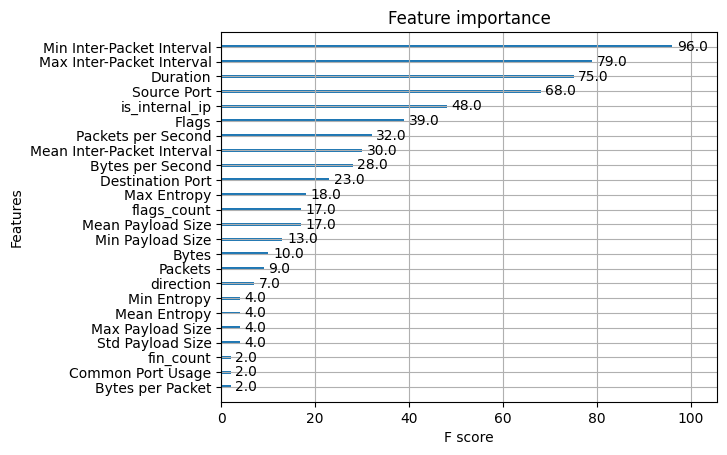

In [59]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


In [47]:
save_as_pickle(r"../../models/dridex/xgb.pkl", xgb_model)

In [21]:
save_as_pickle(r"../../models/emotet/logreg.pkl", logreg_normal_model)